# tsib - Example
Example usage of the Time Series Initialization of Buildings (tsib) library
Date: 18.11.2019

Author: Leander Kotzur

Import required packages

In [1]:
%load_ext autoreload
%autoreload 2
import copy
import tsib
import matplotlib.pyplot as plt
try:
    import tsam.timeseriesaggregation as tsam
except:
    print('Please install tsam first')
    print('pip install tsam')
%matplotlib inline

Get a plotting function

In [2]:
def plotTS(data, periodlength, label):
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', 
                      vmin = stacked.min().min(), vmax = stacked.max().max())
    axes.set_aspect('auto')  
    axes.set_ylabel('Hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label(label)

### Define the building

Get a building configuration

In [3]:
cfg = tsib.BuildingConfiguration({
    "country": 'DE', 
    "buildingYear": 1990,
    "latitude": 50.0,
    "longitude": 8.0,
    "n_persons": 2,
    "a_ref": 150.,
    "n_apartments":1,
    "surrounding":"Detached",
    "mean_load": True,
    "occControl": False,
    
})

Parameterize the building model itself with the configuration

In [4]:
bdg = tsib.Building(configurator = cfg)

### 2. Show the weather data as basis

Get current time series data. Until here, only weather data is provided.

In [5]:
bdg.timeseries.head()

,DHI,T,DNI
2010-01-01 00:30:00+01:00,0,6.5,0.0
2010-01-01 01:30:00+01:00,0,5.2,0.0
2010-01-01 02:30:00+01:00,0,4.4,0.0
2010-01-01 03:30:00+01:00,0,4.4,0.0
2010-01-01 04:30:00+01:00,0,4.4,0.0


Plot the weather data

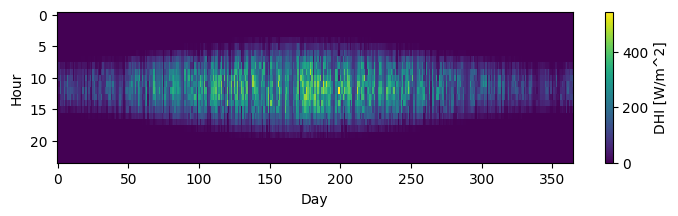

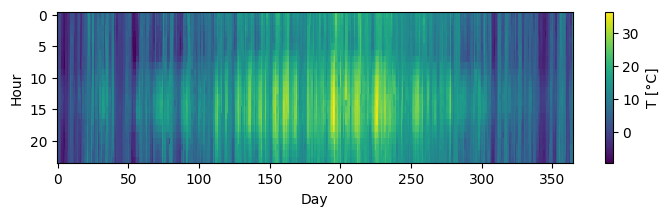

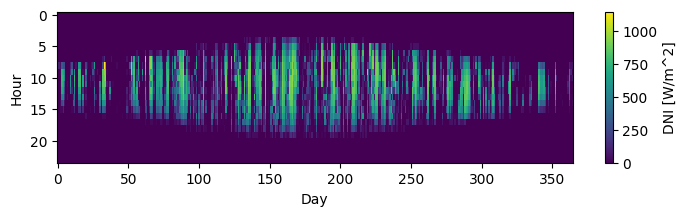

In [6]:
for name in bdg.timeseries:
    plotTS(bdg.timeseries[name], 24, 
           str(name) +  ' [' + bdg.units[name] + ']')

### 3. Get occupancy data

Get the data

In [7]:
occData = bdg.getOccupancy()

Show occupancy related data

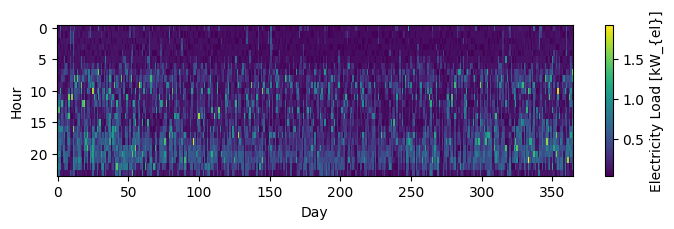

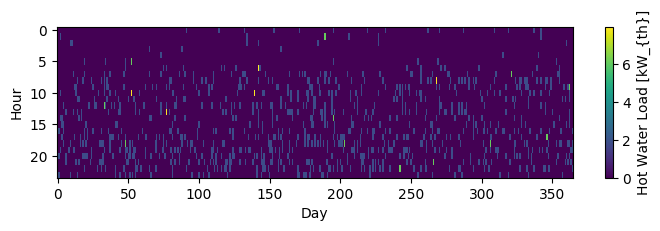

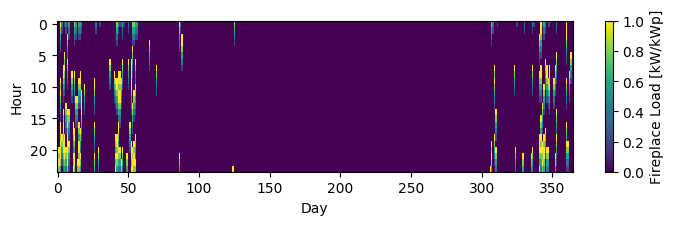

In [8]:
for name in occData:
    plotTS(bdg.timeseries[name], 24, 
           str(name) +  ' [' + bdg.units[name] + ']')

### 4. Get heat load data

Simulate and get the heat load data

In [9]:
heatLoad = bdg.getHeatLoad()

Plot the heat load data

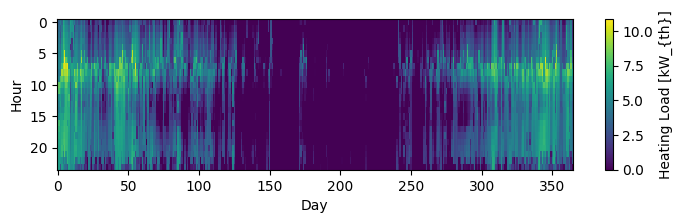

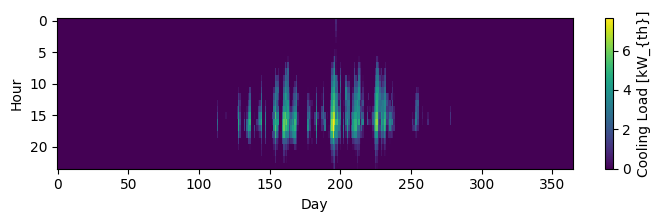

In [10]:
for name in heatLoad:
    if heatLoad[name].max() > 1e-4:
        plotTS(bdg.timeseries[name], 24, 
               str(name) +  ' [' + bdg.units[name] + ']')

### 5. Get renewable potential data

Simulate and get the data

In [11]:
renewables = bdg.getRenewables()

Plot the renewable potential

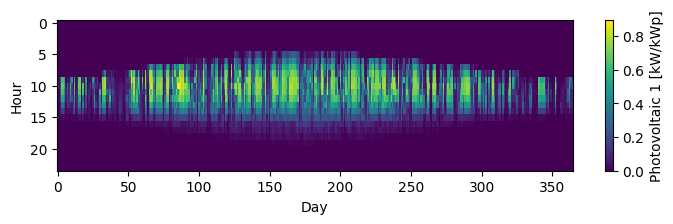

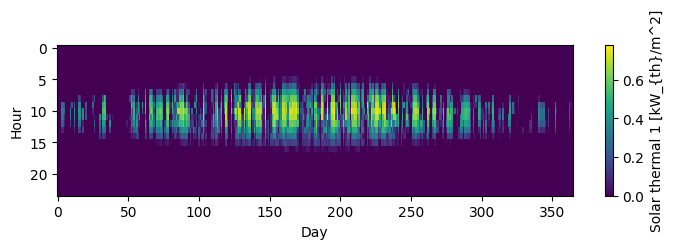

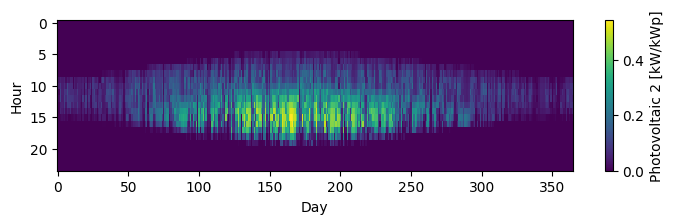

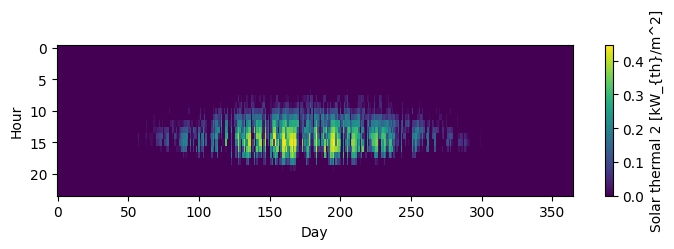

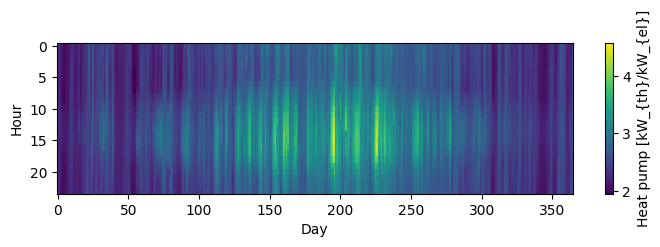

In [12]:
for name in renewables:
    plotTS(bdg.timeseries[name], 24, 
           str(name) +  ' [' + bdg.units[name] + ']')